In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('vgsales.csv')

# Mostrar las primeras filas del DataFrame para entender su estructura
print(df.head())

# Verificar si hay valores nulos en las columnas 'Year' y 'Global_Sales'
print(df[['Year', 'Global_Sales']].isnull().sum())

# Eliminar filas con valores nulos en 'Year' o 'Global_Sales'
df_cleaned = df.dropna(subset=['Year', 'Global_Sales'])

# Calcular el coeficiente de correlación de Pearson
correlation = df_cleaned['Year'].corr(df_cleaned['Global_Sales'])

# Mostrar el coeficiente de correlación
print(f'Coeficiente de correlación entre el año de lanzamiento y las ventas globales: {correlation}')


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
Year            271
Global_Sales      0
dtype: int64
Coeficiente de correlación entre el año de lanzamiento y las ventas globales: -0.07473479761568629


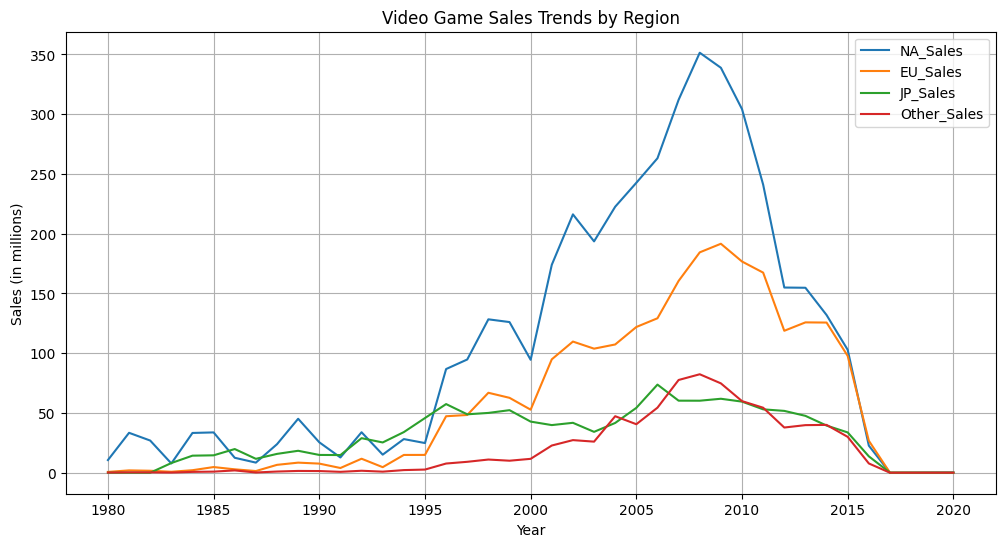

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('vgsales.csv')

# Eliminar filas con valores nulos en 'Year' o en las columnas de ventas regionales
df_cleaned = df.dropna(subset=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# Agrupar por año y sumar las ventas en cada región
sales_by_year = df_cleaned.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Graficar las tendencias de ventas por región
plt.figure(figsize=(12, 6))

for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    plt.plot(sales_by_year.index, sales_by_year[region], label=region)

plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Video Game Sales Trends by Region')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-1-c2306313a9f8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre_Avg_Sales'] = df_cleaned['Genre'].map(genre_avg_sales)
<ipython-input-1-c2306313a9f8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Platform_Avg_Sales'] = df_cleaned['Platform'].map(platform_avg_sales)
<ipython-input-1-c2306313a9f8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Outliers by Genre:
                                    Name         Genre  Global_Sales  \
0                             Wii Sports        Sports         82.74   
1                      Super Mario Bros.      Platform         40.24   
2                         Mario Kart Wii        Racing         35.82   
3                      Wii Sports Resort        Sports         33.00   
4               Pokemon Red/Pokemon Blue  Role-Playing         31.37   
..                                   ...           ...           ...   
339             Tony Hawk's Pro Skater 4        Sports          3.67   
343              Guitar Hero: World Tour          Misc          3.65   
346                         Pokemon Snap    Simulation          3.63   
355  Cooking Mama 2: Dinner With Friends    Simulation          3.61   
400           Rugrats: Search For Reptar     Adventure          3.34   

     Diff_Genre  
0     82.172629  
1     39.300102  
2     35.233438  
3     32.432629  
4     30.745969  
..      

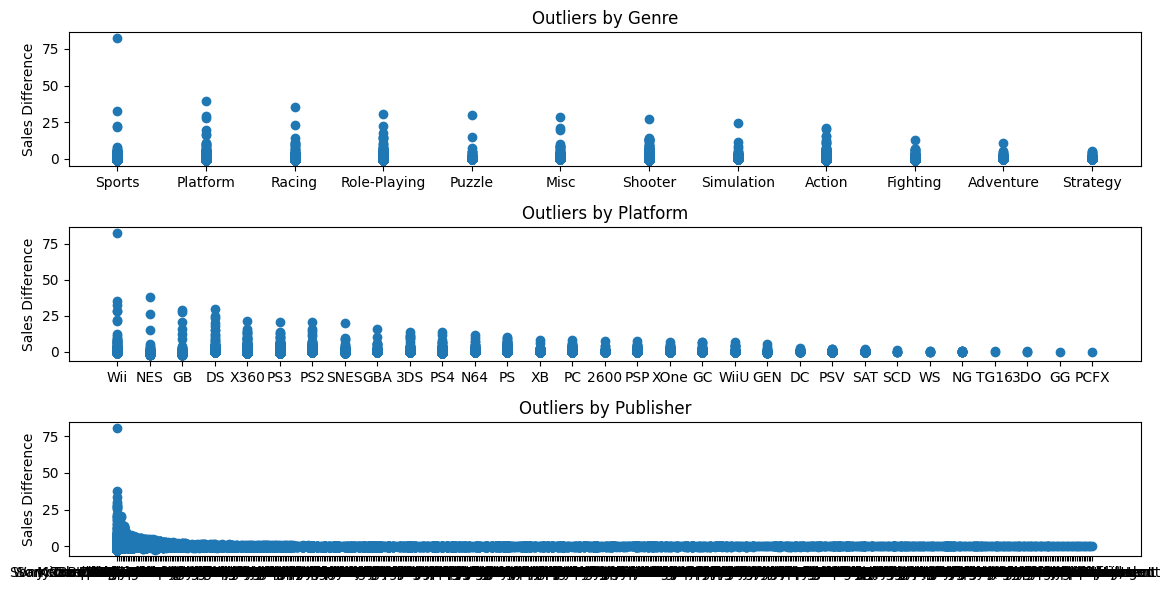

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('vgsales.csv')

# Eliminar filas con valores nulos en 'Global_Sales', 'Genre', 'Platform', y 'Publisher'
df_cleaned = df.dropna(subset=['Global_Sales', 'Genre', 'Platform', 'Publisher'])

# Calcular ventas promedio por género, plataforma y editor
genre_avg_sales = df_cleaned.groupby('Genre')['Global_Sales'].mean()
platform_avg_sales = df_cleaned.groupby('Platform')['Global_Sales'].mean()
publisher_avg_sales = df_cleaned.groupby('Publisher')['Global_Sales'].mean()

# Añadir columnas con ventas promedio al DataFrame original
df_cleaned['Genre_Avg_Sales'] = df_cleaned['Genre'].map(genre_avg_sales)
df_cleaned['Platform_Avg_Sales'] = df_cleaned['Platform'].map(platform_avg_sales)
df_cleaned['Publisher_Avg_Sales'] = df_cleaned['Publisher'].map(publisher_avg_sales)

# Calcular la diferencia entre las ventas y los promedios
df_cleaned['Diff_Genre'] = df_cleaned['Global_Sales'] - df_cleaned['Genre_Avg_Sales']
df_cleaned['Diff_Platform'] = df_cleaned['Global_Sales'] - df_cleaned['Platform_Avg_Sales']
df_cleaned['Diff_Publisher'] = df_cleaned['Global_Sales'] - df_cleaned['Publisher_Avg_Sales']

# Identificar valores atípicos (por ejemplo, aquellos que están 2 desviaciones estándar por encima o por debajo de la media)
outliers_genre = df_cleaned[(df_cleaned['Diff_Genre'].abs() > 2 * df_cleaned['Diff_Genre'].std())]
outliers_platform = df_cleaned[(df_cleaned['Diff_Platform'].abs() > 2 * df_cleaned['Diff_Platform'].std())]
outliers_publisher = df_cleaned[(df_cleaned['Diff_Publisher'].abs() > 2 * df_cleaned['Diff_Publisher'].std())]

# Mostrar algunos de los valores atípicos identificados
print("Outliers by Genre:")
print(outliers_genre[['Name', 'Genre', 'Global_Sales', 'Diff_Genre']])

print("\nOutliers by Platform:")
print(outliers_platform[['Name', 'Platform', 'Global_Sales', 'Diff_Platform']])

print("\nOutliers by Publisher:")
print(outliers_publisher[['Name', 'Publisher', 'Global_Sales', 'Diff_Publisher']])

# Visualizar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.scatter(df_cleaned['Genre'], df_cleaned['Diff_Genre'])
plt.title('Outliers by Genre')
plt.ylabel('Sales Difference')

plt.subplot(3, 1, 2)
plt.scatter(df_cleaned['Platform'], df_cleaned['Diff_Platform'])
plt.title('Outliers by Platform')
plt.ylabel('Sales Difference')

plt.subplot(3, 1, 3)
plt.scatter(df_cleaned['Publisher'], df_cleaned['Diff_Publisher'])
plt.title('Outliers by Publisher')
plt.ylabel('Sales Difference')

plt.tight_layout()
plt.show()


        Platform_Genre  Global_Sales
112      NES - Shooter      5.088571
105    NES - Adventure      4.380000
52   GB - Role-Playing      4.201905
47      GB - Adventure      3.432000
108     NES - Platform      3.420714
50         GB - Puzzle      3.164667
49       GB - Platform      2.890000
252      WiiU - Racing      2.590000
222    SNES - Platform      2.525000
110       NES - Racing      2.445000


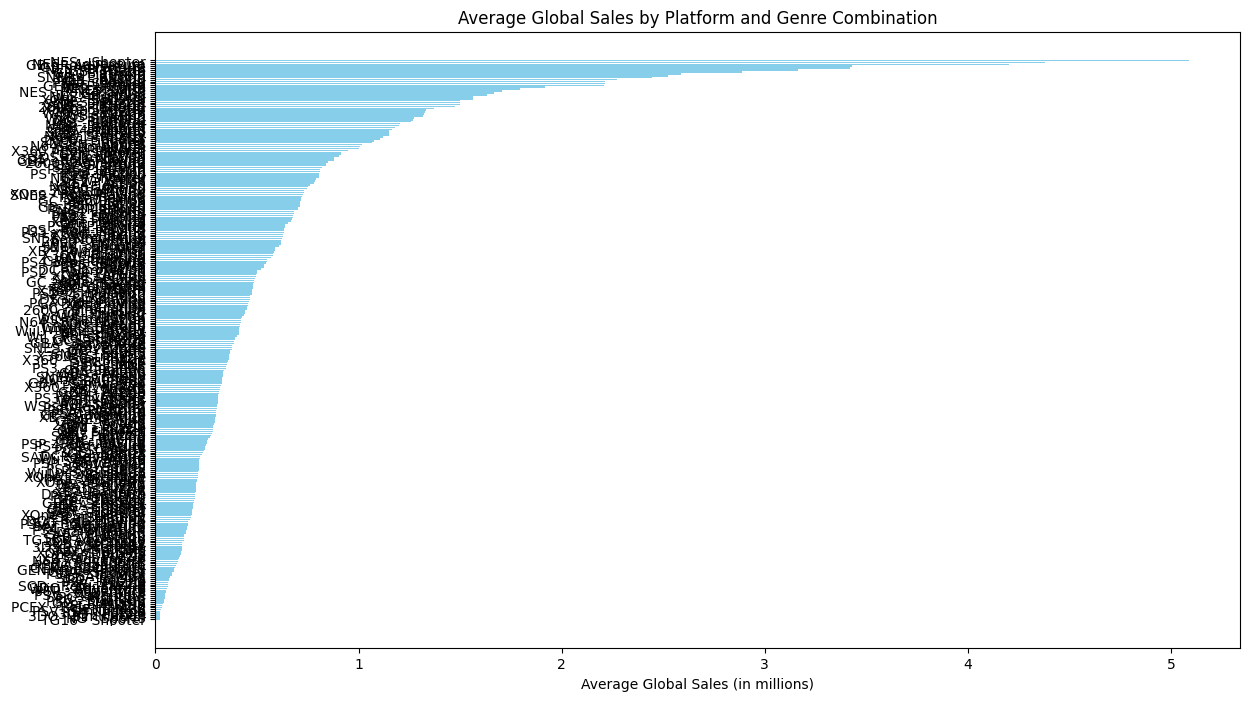

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('vgsales.csv')

# Eliminar filas con valores nulos en 'Global_Sales', 'Genre', y 'Platform'
df_cleaned = df.dropna(subset=['Global_Sales', 'Genre', 'Platform'])

# Crear una nueva columna que combine la plataforma y el género
df_cleaned['Platform_Genre'] = df_cleaned['Platform'] + ' - ' + df_cleaned['Genre']

# Calcular las ventas globales promedio para cada combinación de plataforma y género
platform_genre_sales = df_cleaned.groupby('Platform_Genre')['Global_Sales'].mean().reset_index()

# Ordenar por ventas globales promedio en orden descendente
platform_genre_sales = platform_genre_sales.sort_values(by='Global_Sales', ascending=False)

# Mostrar las combinaciones con las ventas globales promedio más altas
print(platform_genre_sales.head(10))

# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.barh(platform_genre_sales['Platform_Genre'], platform_genre_sales['Global_Sales'], color='skyblue')
plt.xlabel('Average Global Sales (in millions)')
plt.title('Average Global Sales by Platform and Genre Combination')
plt.gca().invert_yaxis() # Para que las combinaciones con mayores ventas aparezcan arriba
plt.show()
